In [1]:
# !unzip archive.zip

Archive:  archive.zip
  inflating: accidental-deaths-in-usa-monthly.csv  
  inflating: ads.csv                 
  inflating: ads_hour.csv            
  inflating: adult.data.csv          
  inflating: adult_test.csv          
  inflating: adult_train.csv         
  inflating: affairs.csv             
  inflating: beauty.csv              
  inflating: credit_scoring_sample.csv  
  inflating: currency.csv            
  inflating: flight_delays_test.csv  
  inflating: flight_delays_train.csv  
  inflating: hostel_factors.csv      
  inflating: medium_posts.csv        
  inflating: microchip_tests.txt     
  inflating: mlbootcamp5_train.csv   
  inflating: samsung_test.txt        
  inflating: samsung_test_labels.txt  
  inflating: samsung_train.txt       
  inflating: samsung_train_labels.txt  
  inflating: site_dic.pkl            
  inflating: telecom_churn.csv       
  inflating: titanic_test.csv        
  inflating: titanic_train.csv       
  inflating: video_games_sales.csv   
  infla

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv("video_games_sales.csv")
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


In [12]:
df.isna().sum(axis=0)

,0
Name,2
Platform,0
Year_of_Release,269
Genre,2
Publisher,54
NA_Sales,0
EU_Sales,0
JP_Sales,0
Other_Sales,0
Global_Sales,0


**Converting naturally integer values into type int**

In [10]:
df['Year_of_Release'] = df['Year_of_Release'].astype('Int64')
df['User_Count'] = df['User_Count'].astype('Int64')

In [11]:
df.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count
count,16450.0,16719.000000,16719.000000,16719.000000,16719.000000,16719.000000,8137.000000,8137.000000,7590.0
mean,2006.487356,0.263330,0.145025,0.077602,0.047332,0.533543,68.967679,26.360821,162.229908
std,5.878995,0.813514,0.503283,0.308818,0.186710,1.547935,13.938165,18.980495,561.282326
min,1980.0,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,4.0
25%,2003.0,0.000000,0.000000,0.000000,0.000000,0.060000,60.000000,12.000000,10.0
50%,2007.0,0.080000,0.020000,0.000000,0.010000,0.170000,71.000000,21.000000,24.0
75%,2010.0,0.240000,0.110000,0.040000,0.030000,0.470000,79.000000,36.000000,81.0
max,2020.0,41.360000,28.960000,10.220000,10.570000,82.530000,98.000000,113.000000,10665.0


**Obtaining top 10 best selling games**

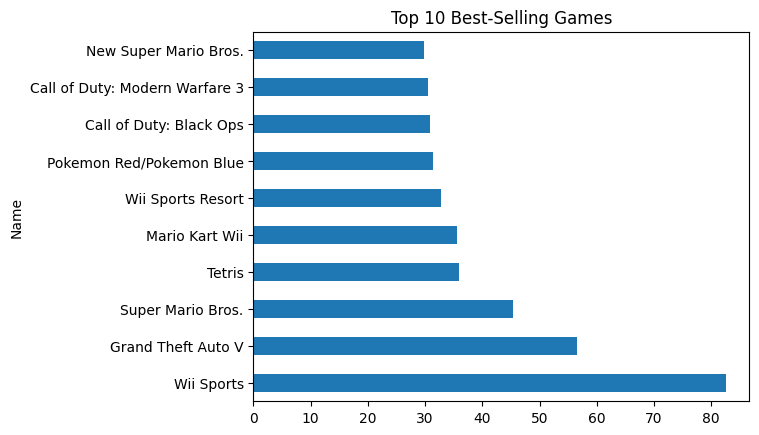

In [17]:
top_games = df.groupby('Name')['Global_Sales'].sum().sort_values(ascending=False).head(10)
top_games.plot(kind='barh', title='Top 10 Best-Selling Games')
plt.show()

**Game Releases each year**

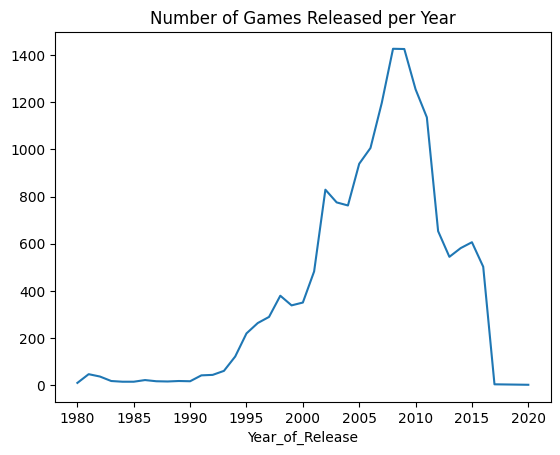

In [20]:
df.groupby('Year_of_Release')['Name'].count().plot(kind='line', title='Number of Games Released per Year')
plt.show()

**Genre Popularity**

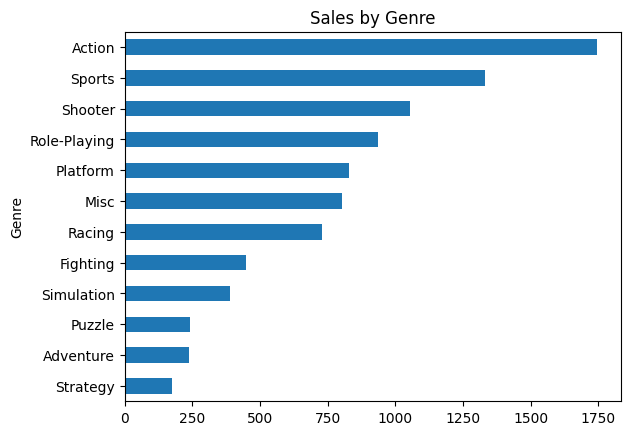

In [21]:
df.groupby('Genre')['Global_Sales'].sum().sort_values().plot(kind='barh', title='Sales by Genre')
plt.show()

**Top Publishers**

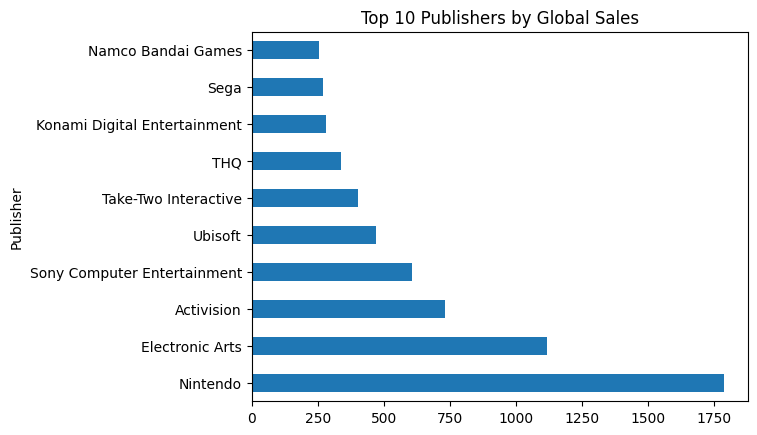

In [22]:
df.groupby('Publisher')['Global_Sales'].sum().sort_values(ascending=False).head(10).plot(kind='barh', title='Top 10 Publishers by Global Sales')
plt.show()

**Genre trends over time**

<Figure size 1400x700 with 0 Axes>

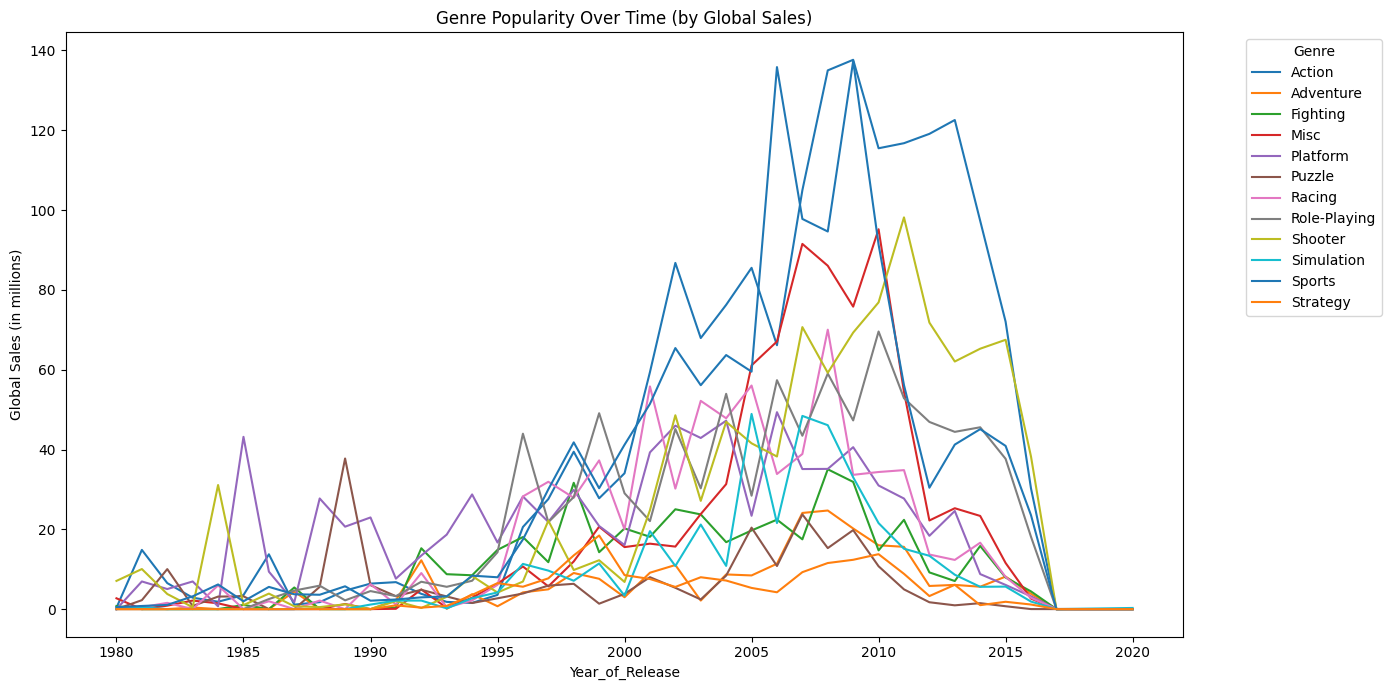

In [24]:
genre_trends = df.groupby(['Year_of_Release', 'Genre'])['Global_Sales'].sum().unstack().fillna(0)

plt.figure(figsize=(14, 7))
genre_trends.plot(figsize=(14, 7))
plt.title('Genre Popularity Over Time (by Global Sales)')
plt.xlabel('Year_of_Release')
plt.ylabel('Global Sales (in millions)')
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

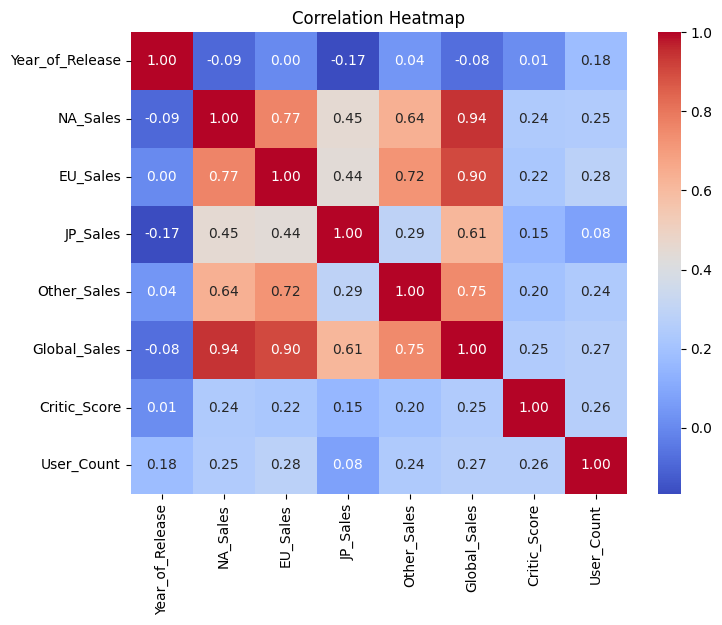

In [26]:
numerical_df = df[['Year_of_Release',	'NA_Sales',	'EU_Sales',	'JP_Sales',	'Other_Sales',	'Global_Sales',	'Critic_Score', 'User_Count']]

corr_matrix = numerical_df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()